# 第一次课作业
**姓名**：王思远

**学号**：202100738017

**班级**：物理创新拔尖班

**时间**：2023.10.23

## 1. 计算立方和

In [1]:
# 计算立方和
def sum_of_cubes(n):
    return sum([i**3 for i in range(1, n+1)])

# 计算1到7的立方和
sum_of_cubes(7)

784

## 2. 冒泡排序

In [2]:
# 冒泡排序
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(1, n-i):
            if arr[j-1] > arr[j]:
                arr[j-1], arr[j] = arr[j], arr[j-1]
    return arr

# 测试
arr = [64, 34, 25, 12, 22, 11, 90]
bubble_sort(arr)

[11, 12, 22, 25, 34, 64, 90]

## 3. 报数游戏

In [3]:
# 报数游戏
def counting_games(total_people, step):
    people = list(range(1, total_people+1))
    result = []

    i = 0
    while len(people) > total_people - 15:
        i = (i + step - 1) % len(people)
        result.append(people.pop(i))

    return result

# 解决问题
result = counting_games(30, 9)
result

[9, 18, 27, 6, 16, 26, 7, 19, 30, 12, 24, 8, 22, 5, 23]

## 4. 热力学参量读取
1. 去除头文件
2. 读取热力学参量的名字及个数
3. 计算各热力学量的最大/小值、均值、标准差

In [4]:
# 热力学参量读取
import numpy as np

def read_thermodynamic_data(path):
    '''读取热力学参量的数据'''
    # Step 1: 去除头文件
    header_lines = 0
    with open(path, 'r') as file:
        for line in file:
            if line.startswith('Step'):
                header_lines += 1
                break
            header_lines += 1
            
    # Step 2: 读取热力学参量的名字
    parameter_names = line.split()
    thermodynamic_data = np.loadtxt('case1.dat', skiprows=header_lines)
    return parameter_names, thermodynamic_data

# Step 3: 计算各热力学量的最大/小值、均值、标准差
def calculate_statistics(thermodynamic_data):
    '''计算给定数据的最大/小值、均值、标准差'''
    max_values = np.max(thermodynamic_data, axis=0)
    min_values = np.min(thermodynamic_data, axis=0)
    mean_values = np.mean(thermodynamic_data, axis=0)
    std_deviation = np.std(thermodynamic_data, axis=0)
    return max_values, min_values, mean_values, std_deviation


parameter_names, thermodynamic_data = read_thermodynamic_data('case1.dat')
max_values, min_values, mean_values, std_deviation = calculate_statistics(thermodynamic_data)
# 输出结果
for i, name in enumerate(parameter_names):
    print(f'{name}: {mean_values[i]:.3f} +/- {std_deviation[i]:.3f} (min: {min_values[i]:.3f}, max: {max_values[i]:.3f})')

Step: 25000.000 +/- 14462.595 (min: 0.000, max: 50000.000)
CPU: 513.232 +/- 295.216 (min: 0.000, max: 1022.198)
Time: 25.000 +/- 14.463 (min: 0.000, max: 50.000)
Temp: 5011.446 +/- 180.883 (min: 4505.630, max: 5632.723)
Press: 4699598.518 +/- 72145.103 (min: 4396098.500, max: 4984438.800)
Volume: 2457.463 +/- 19.061 (min: 2405.110, max: 2508.530)
Density: 6.972 +/- 0.054 (min: 6.830, max: 7.124)
TotEng: -552620.243 +/- 106.461 (min: -552842.500, max: -552374.940)


### 4.1 绘制热力学参量线型图

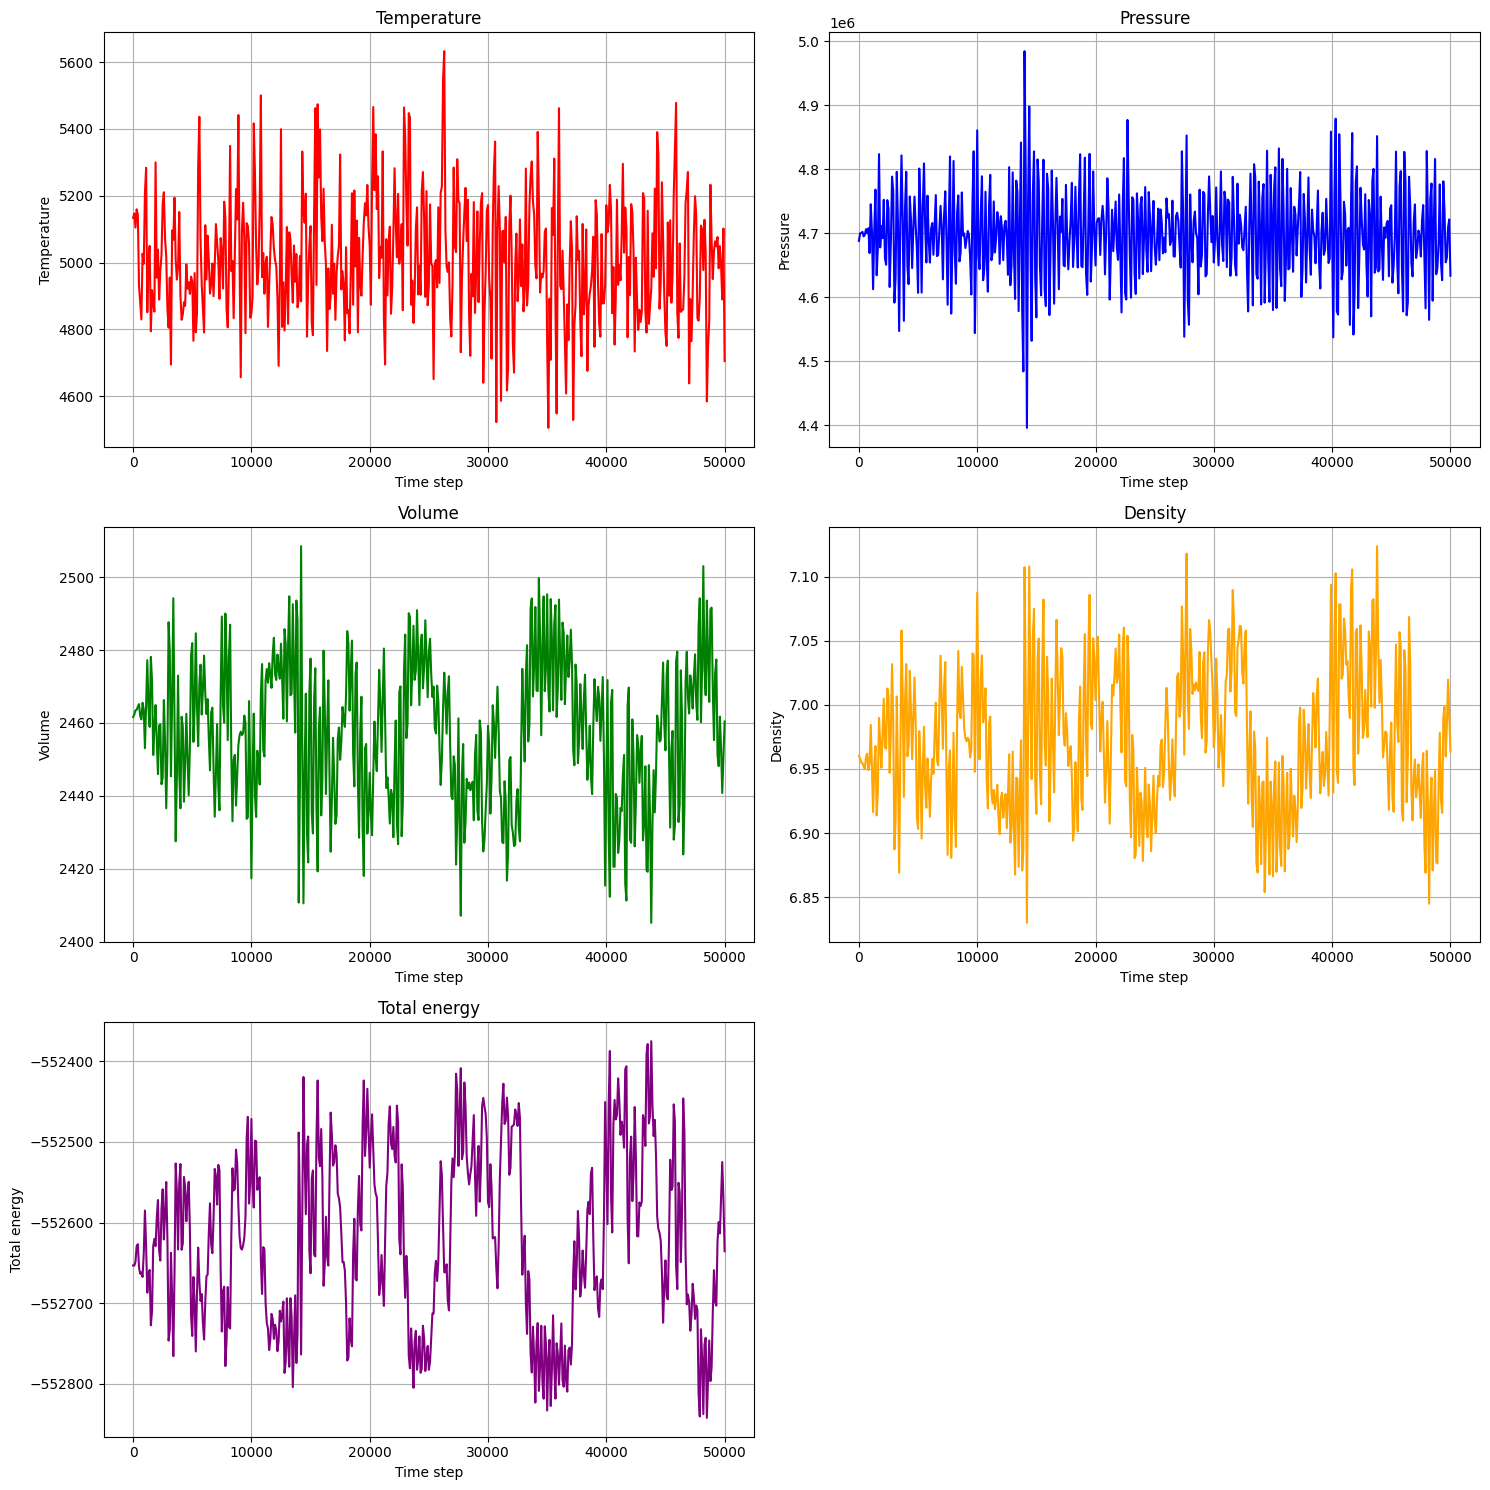

In [5]:
# 绘制热力学参量线型图
import matplotlib.pyplot as plt

# 提取时间步数和热力学参量数据
def extract_thermodynamic_data(thermodynamic_data):
    '''提取时间步数和热力学参量数据'''
    steps = thermodynamic_data[:, 0]
    temperture = thermodynamic_data[:, 3]
    pressure = thermodynamic_data[:, 4]
    volume = thermodynamic_data[:, 5]
    density = thermodynamic_data[:, 6]
    TotEng = thermodynamic_data[:, 7]
    parameters = [temperture, pressure, volume, density, TotEng]
    parameter_names = ['Temperature', 'Pressure', 'Volume', 'Density', 'Total energy']
    return steps, parameters, parameter_names

def draw_thermodynamic_data(thermodynamic_data):
    '''绘制热力学参量线型图'''
    # 提取时间步数和热力学参量数据
    steps, parameters, parameter_names = extract_thermodynamic_data(thermodynamic_data)
    colors = ['red', 'blue', 'green', 'orange', 'purple']

    # 在不同的子图中绘制不同的热力学参量
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))

    for i, ax in enumerate(axes.flat):
        if i >= len(parameter_names):
            # 隐藏多余的子图
            ax.axis('off')
            break
        ax.plot(steps, parameters[i], color=colors[i])
        ax.set_xlabel('Time step')
        ax.set_ylabel(parameter_names[i])
        ax.set_title(parameter_names[i])
        ax.grid(True)

    # 调整子图之间的间距
    fig.tight_layout()

    # 显示图形
    plt.show()

draw_thermodynamic_data(thermodynamic_data)

### 4.2 热力学参量不同时间平均（2, 5, 10）下的误差棒图

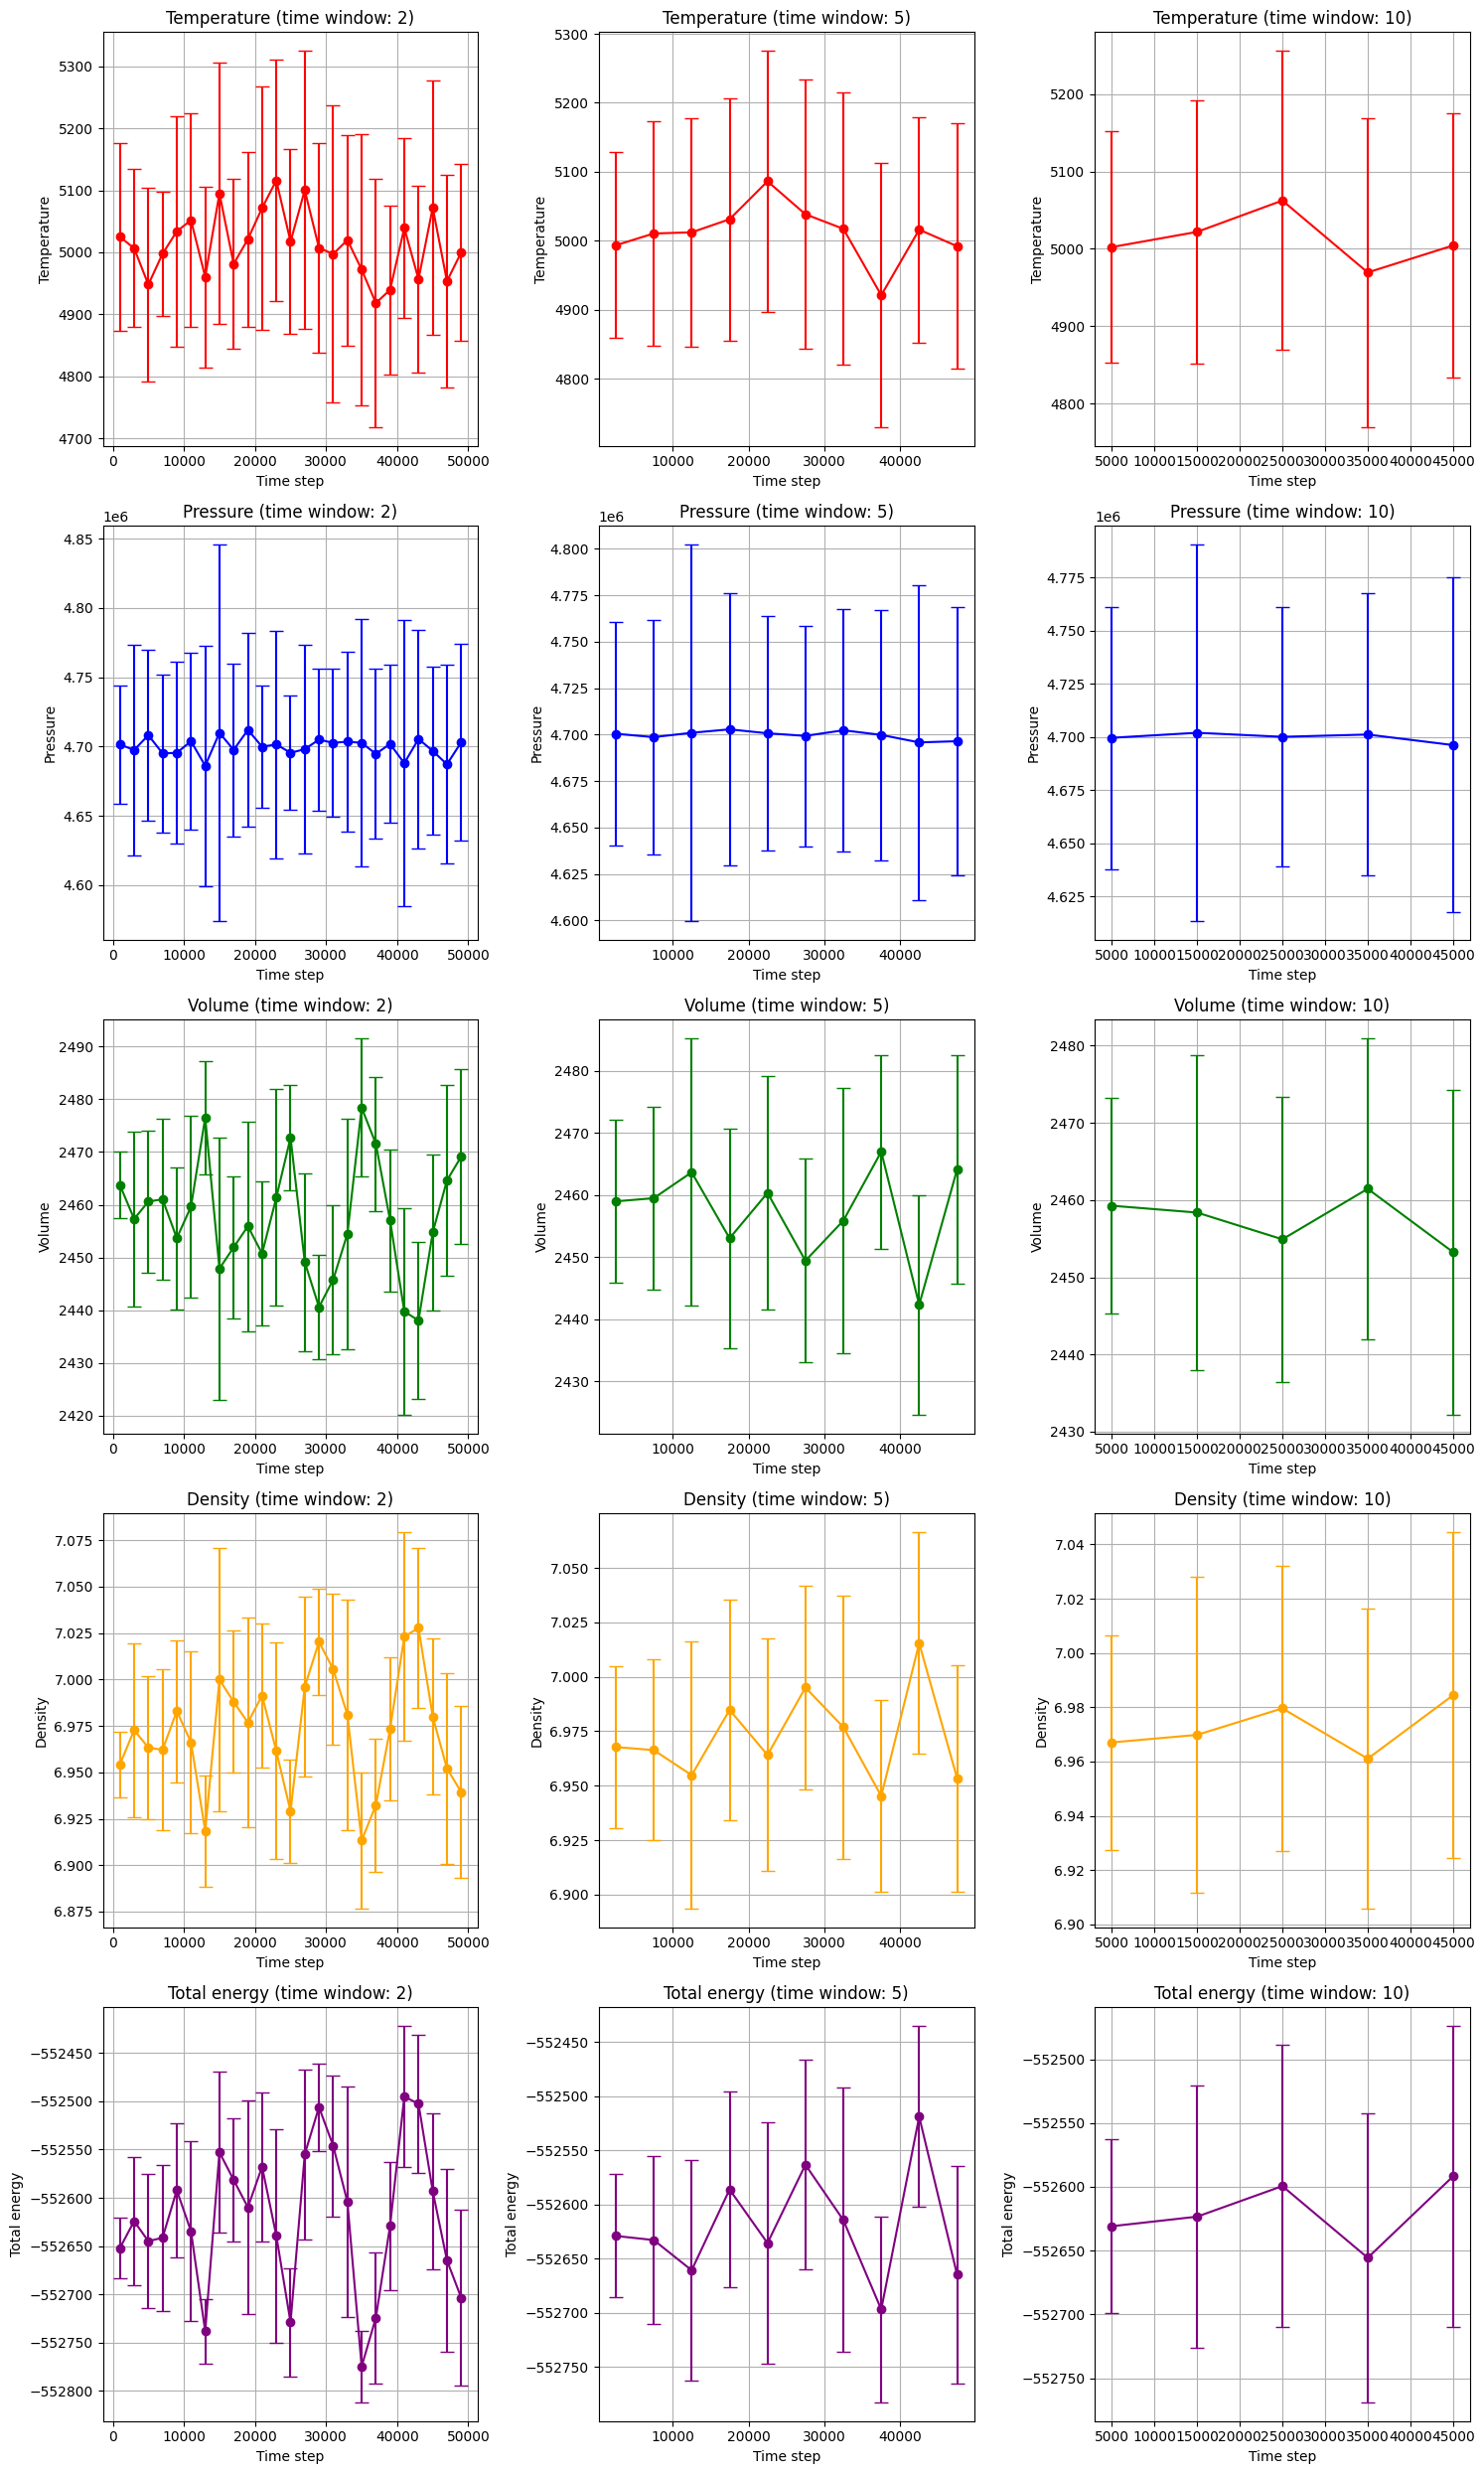

In [6]:
# 热力学参量不同时间平均（2, 5, 10）下的误差棒图

def draw_thermodynamic_error_bar_by_time_window(thermodynamic_data, time_windows):
    '''绘制热力学参量不同时间平均下的误差棒图'''
    # 数据时间间隔
    time_step = 0.1
    # 提取时间步数和热力学参量数据
    steps, parameters, parameter_names = extract_thermodynamic_data(thermodynamic_data)

    fig, axes = plt.subplots(5, 3, figsize=(15, 25))
    colors = ['red', 'blue', 'green', 'orange', 'purple']

    for i, ax in enumerate(axes.flat):
        time_window = time_windows[i % 3]
        parameter = parameters[i // 3]
        # 索引的间隔
        index_window = int(time_window / time_step)
        # 储存当前参量在当前时间窗口下的平均值
        avg_values = []
        # 储存当前参量在当前时间窗口下的误差
        errors = []
        # 存储当前参量在当前时间窗口下的时间步数
        time_steps = []
        for j in range(0, thermodynamic_data.shape[0]-index_window, index_window):
            # 每隔index_window个时间步数计算一次平均值
            avg_values.append(np.mean(parameter[j:j+index_window]))
            # 每隔index_window个时间步数计算一次标准差
            errors.append(np.std(parameter[j:j+index_window]))
            # 记录时间步数
            time_steps.append(steps[j+index_window//2])
            
        # 绘制误差棒图
        ax.errorbar(time_steps, avg_values, yerr=errors, fmt='-o', capsize=5, color=colors[i//3])
        ax.set_xlabel('Time step')
        ax.set_ylabel(parameter_names[i//3])
        ax.set_title(f'{parameter_names[i//3]} (time window: {time_window})')
        ax.grid(True)
        
    # 调整子图之间的间距
    fig.tight_layout()

    # 显示图形
    plt.show()
    
# 绘制误差棒图
time_windows = [2, 5, 10]
draw_thermodynamic_error_bar_by_time_window(thermodynamic_data, time_windows)

## 5. 读取原子参数

In [7]:
# 读取原子参数
import numpy as np

def read_atom_parameter(path):
    '''
    1.将不同构型参量读入到同一个变量
    2.读取盒子大小变化
    3.将原子参量按照ID序号进行排序
    4.某个原子参量随时间的变化
    '''
    # 读取数据
    with open(path, 'r') as file:
        raw_data = file.read()

    lines = raw_data.split('\n')
    data = []

    for i in range(len(lines)):
        # Time step
        if lines[i].startswith('ITEM: TIMESTEP'):
            time_step = int(lines[i+1])
        # Number of atoms
        elif lines[i].startswith('ITEM: NUMBER OF ATOMS'):
            num_atoms = int(lines[i+1])
        # Box bounds
        elif lines[i].startswith('ITEM: BOX BOUNDS'):
            box_bounds = np.array([line.split() for line in lines[i+1:i+4]], dtype=float)
            # 计算盒子大小
            box_size = np.prod(box_bounds[:, 1] - box_bounds[:, 0])
        # Atoms 
        elif lines[i].startswith('ITEM: ATOMS'):
            # 读取原子参数
            atom_data = np.array([line.split() for line in lines[i+1:i+1+num_atoms]], dtype=float)
            # 将原子参数按照ID序号进行排序
            atom_data = atom_data[atom_data[:, 0].argsort()]
            # 整合数据
            data.append([time_step, box_size, atom_data])
    return data

# 某个原子参量随时间的变化
def atom_parameter_vs_time(data, atom_id):
    atom_index = atom_id - 1
    # 读取原子参数
    atom_data = np.array([d[2][atom_index] for d in data])
    return atom_data

data = read_atom_parameter('case2.dat')
# 读取第一个原子参数随时间的变化
atom_parameter_vs_time(data, 1)

array([[  1.       ,   1.       ,   1.69979  ,   6.74335  ,   0.0816924,
         -8.24524  , -24.5227   , -12.5047   ],
       [  1.       ,   1.       ,   1.68936  ,   0.219332 ,   6.60759  ,
          9.08351  ,   1.82534  ,  18.1235   ],
       [  1.       ,   1.       ,   1.60721  ,   6.52775  ,   0.190837 ,
         -5.30778  ,  16.6408   ,   3.62636  ],
       [  1.       ,   1.       ,   1.44847  ,   0.0322972,   0.123265 ,
         -2.06136  ,   2.91722  ,   8.78817  ],
       [  1.       ,   1.       ,   1.40437  ,   0.0851379,   6.67536  ,
          8.01946  ,  -5.69507  , -12.7257   ],
       [  1.       ,   1.       ,   1.81293  ,   0.104421 ,   6.66555  ,
          3.68318  ,  -4.24986  ,  -5.96853  ]])

### 5.1 绘制原子平面轨迹图

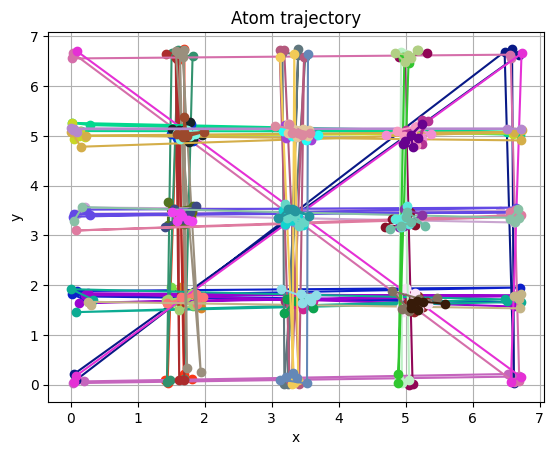

In [8]:
# 原子平面轨迹图
def draw_atom_trajectory(data, atom_id, color='red', ax=None):
    '''绘制指定原子的平面轨迹图'''
    # 读取原子参数
    atom_data = atom_parameter_vs_time(data, atom_id)
    x, y = atom_data[:, 2], atom_data[:, 3]
    # 绘制轨迹图
    if ax is None:
        plt.plot(x, y, '-o', color=color)
    else:
        ax.plot(x, y, '-o', color=color)
    
# 生成随机颜色
import random
def random_color():
    return (random.random(), random.random(), random.random())

# 绘制所有原子的平面轨迹图
def draw_all_atom_trajectory(data):
    '''绘制所有原子的平面轨迹图'''
    for i in range(data[0][2].shape[0]):
        draw_atom_trajectory(data, i+1, color=random_color())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Atom trajectory')
    plt.grid(True)
    plt.show()
    
draw_all_atom_trajectory(data)

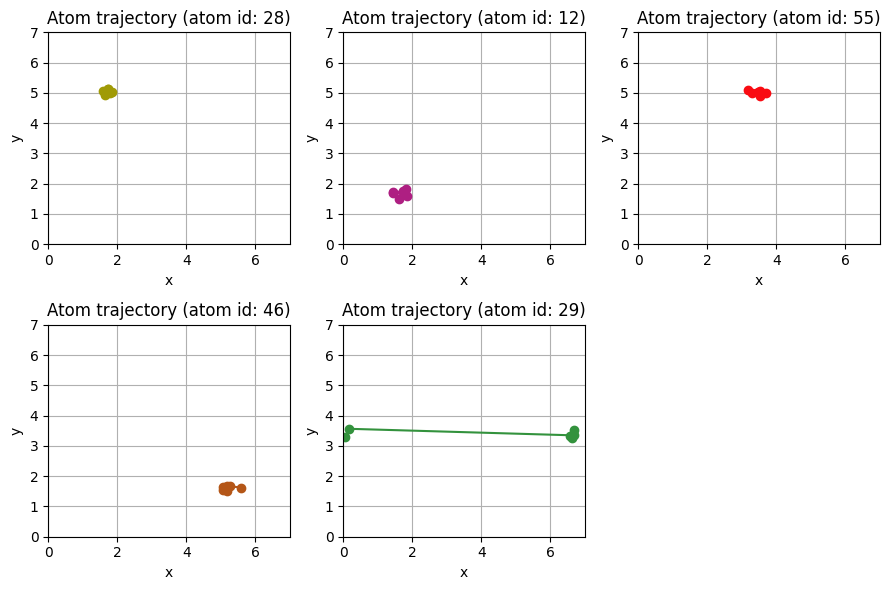

In [14]:
# 随机挑选5个原子绘制平面轨迹图
import random


number_of_atoms = data[0][2].shape[0]
atom_ids = random.sample(range(1, number_of_atoms), 5)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))

for i, ax in enumerate(axes.flat):
    if i >= len(atom_ids):
        # 隐藏多余的子图
        ax.axis('off')
        break
    draw_atom_trajectory(data, atom_ids[i], color=random_color(), ax=ax)
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Atom trajectory (atom id: {atom_ids[i]})')
    ax.grid(True)

# 调整子图之间的间距
fig.tight_layout()

# 显示图形
plt.show()

### 5.2 绘制位置-速度(x-vx, …) 散点分布图

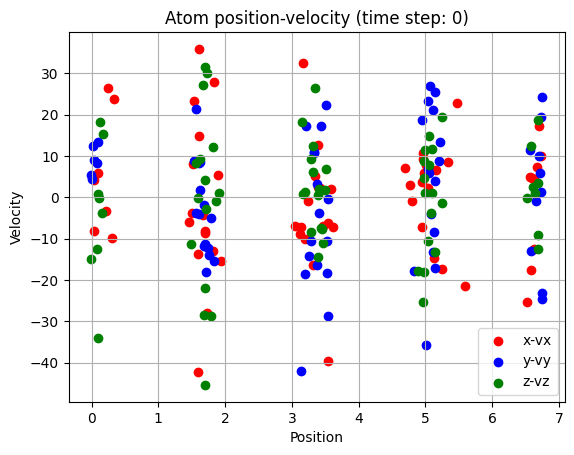

In [10]:
# 位置-速度(x-vx, …) 散点分布图

def draw_atom_scatter(data, time_step, colors=['red', 'blue', 'green']):
    '''绘制指定时间原子的位置-速度散点分布图'''
    # 读取原子参数
    atom_data = read_atom_parameter_by_time_step(data, time_step)
    x, y, z = atom_data[:, 2], atom_data[:, 3], atom_data[:, 4]
    vx, vy, vz = atom_data[:, 5], atom_data[:, 6], atom_data[:, 7]
    # 绘制散点图
    plt.scatter(x, vx, color=colors[0], label='x-vx')
    plt.scatter(y, vy, color=colors[1], label='y-vy')
    plt.scatter(z, vz, color=colors[2], label='z-vz')
    plt.legend()
    
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title(f'Atom position-velocity (time step: {time_step})')
    plt.grid(True)
    plt.show()
    
# 读取指定时间步数的原子参数
def read_atom_parameter_by_time_step(data, time_step):
    '''读取指定时间步数的原子参数'''
    for d in data:
        if d[0] == time_step:
            return d[2]
    return None

# 绘制时间步数0时的原子位置-速度散点分布图
data = read_atom_parameter('case2.dat')
draw_atom_scatter(data, 0)

### 5.3 绘制速度分布直方图

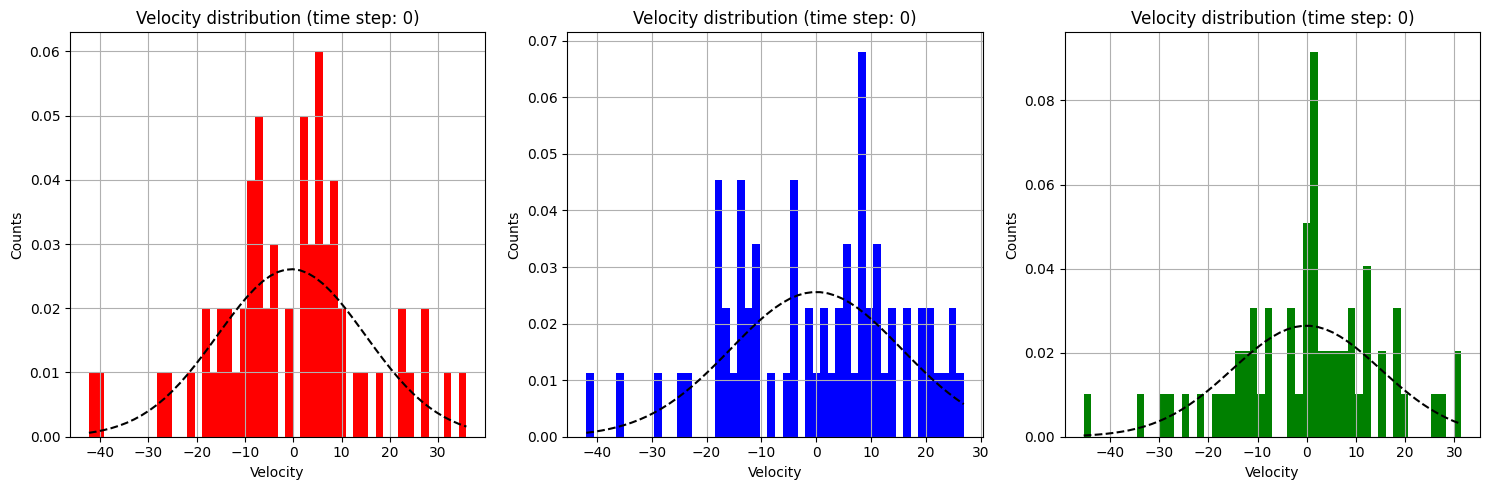

In [11]:
# 速度分布直方图
import scipy.stats as stats

def draw_atom_velocity_distribution(data, time_step, colors=['red', 'blue', 'green']):
    '''绘制指定时间原子的速度分布直方图'''
    # 读取原子参数
    atom_data = read_atom_parameter_by_time_step(data, time_step)
    vx, vy, vz = atom_data[:, 5], atom_data[:, 6], atom_data[:, 7]
    vs = [vx, vy, vz]
    # 绘制直方图
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        # 绘制直方图
        n, bins, patches = ax.hist(vs[i], bins=50, color=colors[i], density=True)
        
        # 计算正态分布的拟合曲线
        mu, sigma = np.mean(vs[i]), np.std(vs[i])
        y = stats.norm.pdf(bins, mu, sigma)
        ax.plot(bins, y, '--', color='black')
        
        ax.set_xlabel('Velocity')
        ax.set_ylabel('Counts')
        ax.set_title(f'Velocity distribution (time step: {time_step})')
        ax.grid(True)
    fig.tight_layout()
    plt.show()
    
# 绘制时间步数0时的原子速度分布直方图
data = read_atom_parameter('case2.dat')
draw_atom_velocity_distribution(data, 0)

### 5.4 绘制物理量随时空演化图

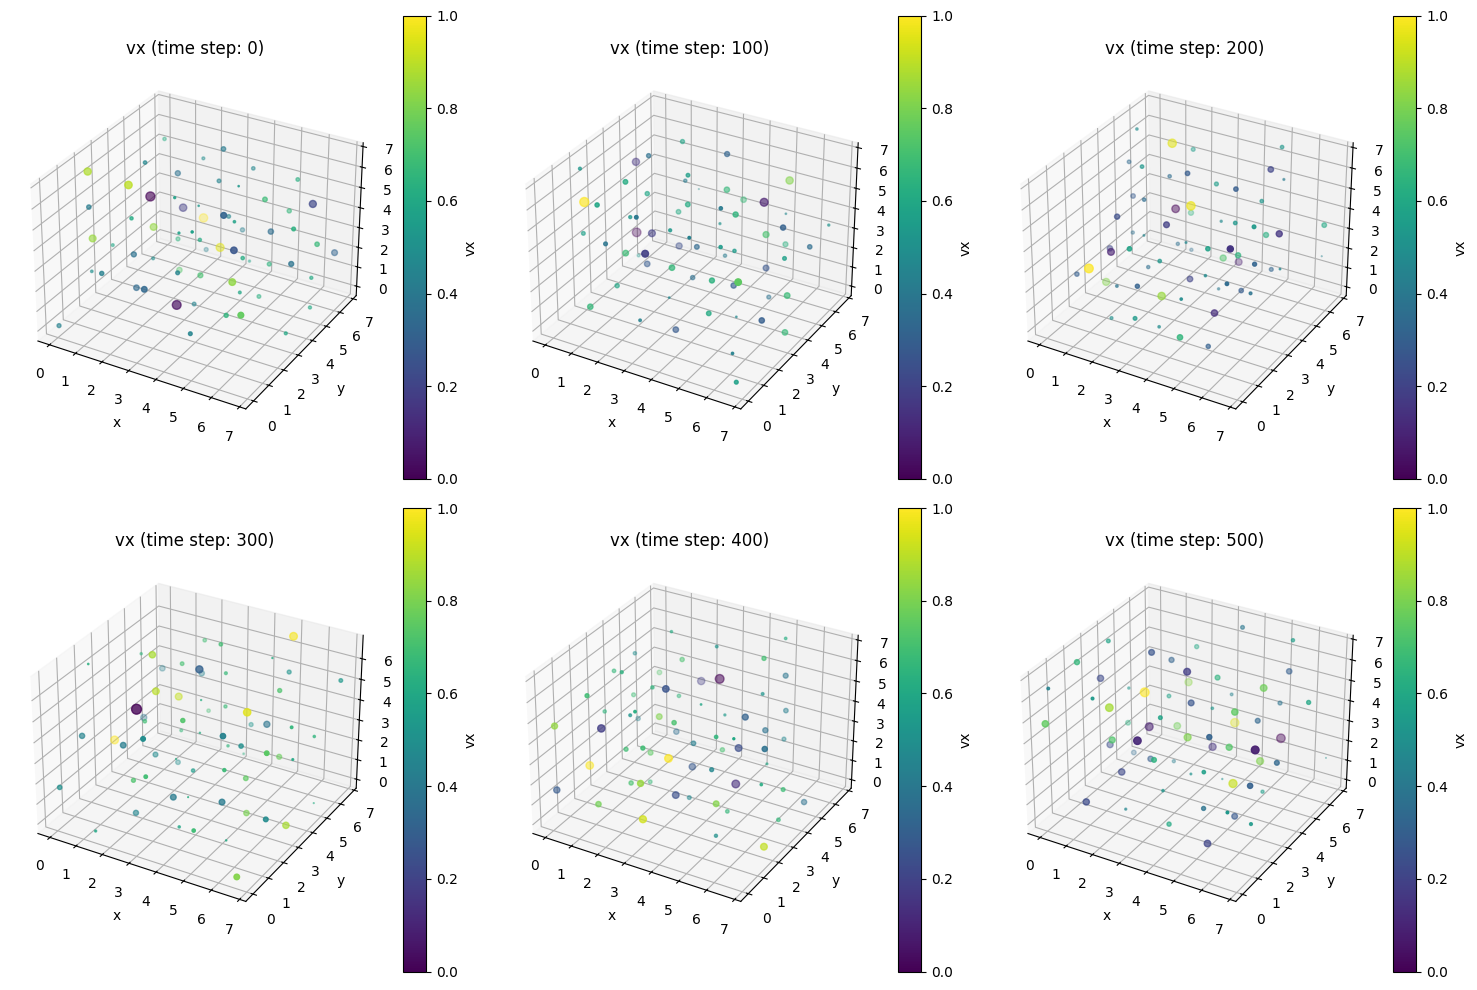

In [12]:
# 物理量随时空演化图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def draw_atom_data_by_time_space(data, parameter):
    parameter_names = ['id', 'type', 'x', 'y', 'z', 'vx', 'vy', 'vz']
    parameter_index = parameter_names.index(parameter)
    # 时间步列表
    time_steps = [d[0] for d in data]
    # 绘制图形
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': '3d'})
    for i, ax in enumerate(axes.flat):
        # 读取原子参数
        atom_data = read_atom_parameter_by_time_step(data, time_steps[i])
        x, y, z = atom_data[:, 2], atom_data[:, 3], atom_data[:, 4]
        parameter = atom_data[:, parameter_index]
        # 创建颜色映射
        norm = plt.Normalize(vmin=parameter.min(), vmax=parameter.max())
        colors = cm.viridis(norm(parameter))
        # 绘制散点图，根据点的大小和颜色来表示原子的参数
        sc = ax.scatter(x, y, z, s=np.abs(parameter), c=colors)
        # 添加颜色条
        fig.colorbar(sc, ax=ax, label=f'{parameter_names[parameter_index]}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title(f'{parameter_names[parameter_index]} (time step: {time_steps[i]})')
        ax.grid(True)
        
    fig.tight_layout()
    plt.show()
        
draw_atom_data_by_time_space(data, 'vx')

In [16]:
# 非均匀数据读取
import pandas as pd

def parse_data(file_path):
    '''
    解析非均匀数据文件

    参数:
    - file_path (str): 文件路径

    返回:
    - timesteps (list): 时间步列表
    - dfs (list): 数据帧列表，每一个数据帧对应一个时间步
    '''
    
    # 存储数据的列表
    timesteps = []
    chunk_data = []
    
    # 解析文件
    with open(file_path, 'r') as file:
        lines = file.readlines()
        i = 0
        while i < len(lines):
            line = lines[i].strip()
            # 跳过注释
            if line.startswith('#'):
                i += 1
                continue
            # 解析时间步和数据块数量
            timestep, num_chunks, _ = map(float, line.split())
            timesteps.append(timestep)
            chunks = []
            # 遍历当前时间步的数据块
            for j in range(int(num_chunks)):
                i += 1
                chunk_line = lines[i].strip().split()
                chunk = {
                    'Chunk': int(chunk_line[0]),
                    'Coord1': float(chunk_line[1]),
                    'Ncount': float(chunk_line[2]),
                    'density/mass': float(chunk_line[3]),
                    'c_keatom': float(chunk_line[4])
                }
                chunks.append(chunk)
            chunk_data.append(chunks)
            i += 1

    # 将解析的数据转换为数据帧以便可视化
    dfs = [pd.DataFrame(chunk) for chunk in chunk_data]
    
    return timesteps, dfs

# 使用函数，并显示第一个时间步的数据帧作为示例
timesteps, dataframes = parse_data('./case3.dat')
dataframes[0]


,Chunk,Coord1,Ncount,density/mass,c_keatom
0,1,3.99663,1024.000,3.772460,3.067540e-02
1,2,11.99660,1024.000,3.772460,2.249220e-06
2,3,19.99660,1024.000,3.772460,1.111200e-04
3,4,27.99660,1024.000,3.772460,2.360650e-02
4,5,35.99660,256.077,0.943399,3.777430e-08
